## Imports

In [99]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd
import scipy as scp
import numpy as np

from sklearn.mixture import GaussianMixture
from scipy.spatial import Voronoi, voronoi_plot_2d

## Functions

In [178]:
color_iter = ["purple", "gold"]

In [180]:
def plot_results(X, Y, means, covariances, index, title):
    plt.figure(figsize=(5,3))
    plt.scatter(X['feature1'], X['feature2'], 4, c=Y)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)): 
        v, w = scp.linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / scp.linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y == i):
            continue

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
        ell.set_clip_box(plt.subplot(1,1,1).bbox)
        ell.set_alpha(0.3)
        plt.subplot(1,1,1).add_artist(ell)
    plt.title(title)
    plt.show()

## Read dataset

In [29]:
features = [f'feature{i}' for i in range(1,31)]

In [30]:
df =  pd.read_csv('wdbc.data', sep=",", names=['id', 'label'] + features )

In [31]:
df.head()

,id,label,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [63]:
X = df.iloc[:,2:4].copy(deep=True)

In [64]:
y = df.iloc[:, [1]].copy(deep=True)

In [65]:
y['label'] = y['label'].apply(lambda x: 1 if x == "M" else 0)

array([[<AxesSubplot: title={'center': 'label'}>]], dtype=object)

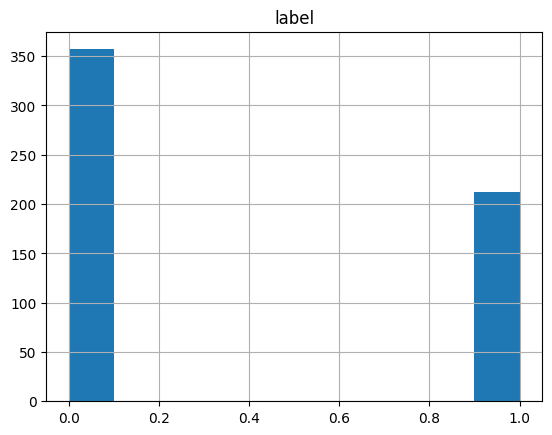

In [68]:
y.hist()

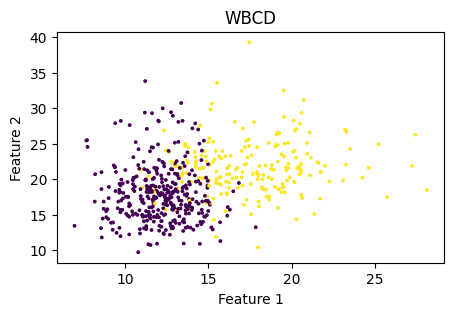

In [77]:
plt.figure(figsize=(5,3)) 
plt.scatter(X['feature1'], X['feature2'], marker='o', c=y['label'], s=3)
plt.title("WBCD")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## sklearn EM(GMM)

In [78]:
gm = GaussianMixture(n_components=2, random_state=67)
gm_labels = gm.fit_predict(X)
centers = gm.means_

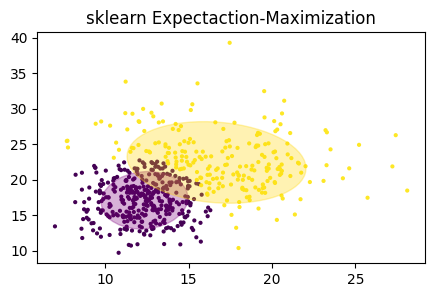

In [182]:
plot_results(X, gm_labels, gm.means_, gm.covariances_, 0, "sklearn Expectaction-Maximization")

## My EM(GMM)